In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from glob import glob 
#from skimage.io import imread #read images from files
import os
import cv2 as cv
from PIL import Image
from keras_unet_collection import models
import matplotlib.pyplot as plt # plt show image
import matplotlib.image as mpimg # mpimg read image
import tensorflow as tf

In [4]:
base_tile_dir0 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/train/red5/crop_new/individual/'
df0= pd.DataFrame({'path': glob(os.path.join(base_tile_dir0,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df0['filename'] = df0.path.map(lambda x: x.split('\\')[1])
df0['label']=0
#labels = pd.read_csv("D:/datasets/list_attr_celeba.txt",sep='\t')
print(df0.shape)
df0.head()

(293, 3)


,path,filename,label
0,E:/ziheng-projects/test_jerome/segmentation/da...,red_14_crop_0.png,0
1,E:/ziheng-projects/test_jerome/segmentation/da...,red_191_crop_0_crop_0.png,0
2,E:/ziheng-projects/test_jerome/segmentation/da...,red_191_crop_0_crop_1.png,0
3,E:/ziheng-projects/test_jerome/segmentation/da...,red_191_crop_0_crop_2.png,0
4,E:/ziheng-projects/test_jerome/segmentation/da...,red_191_crop_1.png,0


In [5]:
base_tile_dir1 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/train/white5/crop_new/individual/'
df1= pd.DataFrame({'path': glob(os.path.join(base_tile_dir1,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df1['filename'] = df1.path.map(lambda x: x.split('\\')[1])
df1['label']=1
#labels = pd.read_csv("D:/datasets/list_attr_celeba.txt",sep='\t')
print(df1.shape)
df1.head()

(293, 3)


,path,filename,label
0,E:/ziheng-projects/test_jerome/segmentation/da...,white_100_crop_19.png,1
1,E:/ziheng-projects/test_jerome/segmentation/da...,white_100_crop_1_crop_1.png,1
2,E:/ziheng-projects/test_jerome/segmentation/da...,white_100_crop_20.png,1
3,E:/ziheng-projects/test_jerome/segmentation/da...,white_100_crop_25.png,1
4,E:/ziheng-projects/test_jerome/segmentation/da...,white_100_crop_27.png,1


In [6]:
base_tile_dir2 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/train/yellow5/crop_new/individual/'
df2= pd.DataFrame({'path': glob(os.path.join(base_tile_dir2,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df2['filename'] = df2.path.map(lambda x: x.split('\\')[1])
df2['label']=2
#labels = pd.read_csv("D:/datasets/list_attr_celeba.txt",sep='\t')
print(df2.shape)
df2.head()

(293, 3)


,path,filename,label
0,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_100_crop_1.png,2
1,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_100_crop_2.png,2
2,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_100_crop_3.png,2
3,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_100_crop_4.png,2
4,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_100_crop_7.png,2


In [7]:
base_tile_dir3 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/train/blue5/crop_new/individual/'
df3= pd.DataFrame({'path': glob(os.path.join(base_tile_dir3,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df3['filename'] = df3.path.map(lambda x: x.split('\\')[1])
df3['label']=3
#labels = pd.read_csv("D:/datasets/list_attr_celeba.txt",sep='\t')
print(df3.shape)
df3.head()

(293, 3)


,path,filename,label
0,E:/ziheng-projects/test_jerome/segmentation/da...,blue_100_crop_0.png,3
1,E:/ziheng-projects/test_jerome/segmentation/da...,blue_100_crop_1.png,3
2,E:/ziheng-projects/test_jerome/segmentation/da...,blue_100_crop_12.png,3
3,E:/ziheng-projects/test_jerome/segmentation/da...,blue_100_crop_13.png,3
4,E:/ziheng-projects/test_jerome/segmentation/da...,blue_100_crop_14.png,3


In [8]:
df = pd.concat([df0,df1,df2,df3], ignore_index=True).reset_index()
df = df[["path", "filename", "label"]]
df.sample(8)

,path,filename,label
164,E:/ziheng-projects/test_jerome/segmentation/da...,red_246_crop_23.png,0
1038,E:/ziheng-projects/test_jerome/segmentation/da...,blue_14_crop_5_crop_0.png,3
631,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_116_crop_2.png,2
931,E:/ziheng-projects/test_jerome/segmentation/da...,blue_118_crop_3.png,3
996,E:/ziheng-projects/test_jerome/segmentation/da...,blue_12_crop_12.png,3
524,E:/ziheng-projects/test_jerome/segmentation/da...,white_31_crop_27.png,1
269,E:/ziheng-projects/test_jerome/segmentation/da...,red_274_crop_1.png,0
725,E:/ziheng-projects/test_jerome/segmentation/da...,yellow_14_crop_48.png,2


In [9]:
# def read_grayscale_img(img):
#     return cv.imread(img, cv.IMREAD_GRAYSCALE)

df['image'] = df['path'].map(cv.imread)

input_images = np.stack(list(df.image), axis = 0)
print(input_images.shape)

(1172, 224, 224, 3)


In [10]:
from keras.utils import np_utils

train_targets = np_utils.to_categorical(df.label, num_classes=4)
train_tensors = input_images

In [4]:
#validation data
from keras.utils import np_utils
base_tile_dir4 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/red/'
df4= pd.DataFrame({'path': glob(os.path.join(base_tile_dir4,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df4['filename'] = df4.path.map(lambda x: x.split('\\')[1])
df4['label']=0

base_tile_dir5 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/white/'
df5= pd.DataFrame({'path': glob(os.path.join(base_tile_dir5,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df5['filename'] = df5.path.map(lambda x: x.split('\\')[1])
df5['label']=1


base_tile_dir6 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/yellow/'
df6= pd.DataFrame({'path': glob(os.path.join(base_tile_dir6,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df6['filename'] = df6.path.map(lambda x: x.split('\\')[1])
df6['label']=2

base_tile_dir7 = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/blue/'
df7= pd.DataFrame({'path': glob(os.path.join(base_tile_dir7,'*.png'))})
#df['id'] = df.path.map(lambda x: x.split('\\')[1].split(".")[0])
df7['filename'] = df7.path.map(lambda x: x.split('\\')[1])
df7['label']=3

df_val = pd.concat([df4,df5,df6,df7], ignore_index=True).reset_index()
df_val = df_val[["path", "filename", "label"]]

df_val['image'] = df_val['path'].map(cv.imread)


val_tensors = np.stack(list(df_val.image), axis = 0)
print(val_tensors.shape)
val_targets = np_utils.to_categorical(df_val.label, num_classes=4)

(444, 224, 224, 3)


In [5]:
from keras_unet_collection.layer_utils import *
from keras_unet_collection.activations import GELU, Snake
from keras_unet_collection.transformer_layers import patch_extract, patch_embedding
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, MultiHeadAttention, LayerNormalization, Dense, Embedding
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau


def ViT_MLP(X, filter_num, activation='GELU', name='MLP'):
    '''
    The MLP block of ViT.
    
    ----------
    Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, 
    T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S. and Uszkoreit, J., 2020. 
    An image is worth 16x16 words: Transformers for image recognition at scale. 
    arXiv preprint arXiv:2010.11929.
    
    Input
    ----------
        X: the input tensor of MLP, i.e., after MSA and skip connections
        filter_num: a list that defines the number of nodes for each MLP layer.
                        For the last MLP layer, its number of node must equal to the dimension of key.
        activation: activation of MLP nodes.
        name: prefix of the created keras layers.
        
    Output
    ----------
        V: output tensor.
    '''
    activation_func = eval(activation)
    
    for i, f in enumerate(filter_num):
        X = Dense(f, name='{}_dense_{}'.format(name, i))(X)
        X = activation_func(name='{}_activation_{}'.format(name, i))(X)
        
    return X

def ViT_block(V, num_heads, key_dim, filter_num_MLP, activation='GELU', name='ViT'):
    '''
    
    Vision transformer (ViT) block.
    
    ViT_block(V, num_heads, key_dim, filter_num_MLP, activation='GELU', name='ViT')
    
    ----------
    Dosovitskiy, A., Beyer, L., Kolesnikov, A., Weissenborn, D., Zhai, X., Unterthiner, 
    T., Dehghani, M., Minderer, M., Heigold, G., Gelly, S. and Uszkoreit, J., 2020. 
    An image is worth 16x16 words: Transformers for image recognition at scale. 
    arXiv preprint arXiv:2010.11929.
    
    Input
    ----------
        V: embedded input features.
        num_heads: number of attention heads.
        key_dim: dimension of the attention key (equals to the embeded dimensions).
        filter_num_MLP: a list that defines the number of nodes for each MLP layer.
                        For the last MLP layer, its number of node must equal to the dimension of key.
        activation: activation of MLP nodes.
        name: prefix of the created keras layers.
        
    Output
    ----------
        V: output tensor.
    
    '''
    # Multiheaded self-attention (MSA)
    V_atten = V # <--- skip
    V_atten = LayerNormalization(name='{}_layer_norm_1'.format(name))(V_atten)
    V_atten = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim, 
                                 name='{}_atten'.format(name))(V_atten, V_atten)
    # Skip connection
    V_add = add([V_atten, V], name='{}_skip_1'.format(name)) # <--- skip
    
    # MLP
    V_MLP = V_add # <--- skip
    V_MLP = LayerNormalization(name='{}_layer_norm_2'.format(name))(V_MLP)
    V_MLP = ViT_MLP(V_MLP, filter_num_MLP, activation, name='{}_mlp'.format(name))
    # Skip connection
    V_out = add([V_MLP, V_add], name='{}_skip_2'.format(name)) # <--- skip
    
    return V_out

In [6]:
input_shape = (224, 224, 3)
img_input = Input(shape=input_shape)

# Block 1
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(16, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)



patch_size=1
x = patch_extract((patch_size, patch_size))(x)
x = patch_embedding(49, 128)(x)
filter_num_MLP = [32, 128]
num_transformer=6
name='TransLightNet'
for i in range(num_transformer):
    x = ViT_block(x, 12, 128, filter_num_MLP, activation='GELU',
                 name='{}_ViT_{}'.format(name, i))
x = Flatten()(x)  
x = Dense(256, activation='elu', name='fc1')(x)  
x = Dropout(0.5)(x) 



predictions = Dense(4, activation='softmax', name='predictions')(x) 
model = Model(img_input, predictions)  
model.compile(Adam(0.0001), loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()
checkpointer = ModelCheckpoint(filepath='E:/ziheng-projects/test_jerome/classification/tf2/TransLightNet_B32_50_noAug_Trans4_new4class_moreConv10_4M.hdf5',monitor='val_loss', verbose=1, save_best_only=True)


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 224, 224, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv2 (Conv2D)           (None, 224, 224, 16) 2320        block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_pool (MaxPooling2D)      (None, 112, 112, 16) 0           block1_conv2[0][0]               
______________________________________________________________________________________________

In [57]:
epochs = 50
history = model.fit(train_tensors, train_targets, 
          validation_data=(val_tensors, val_targets),
          epochs=epochs, batch_size=32, verbose=1, callbacks = [checkpointer],shuffle=True)

Epoch 1/50
37/37 [==============================] - 14s 164ms/step - loss: 1.1298 - accuracy: 0.6203 - val_loss: 0.2881 - val_accuracy: 0.9099

Epoch 00001: val_loss improved from inf to 0.28810, saving model to E:/ziheng-projects/test_jerome/classification/tf2\TransLightNet_B32_50_noAug_Trans4_new4class_moreConv10_4M.hdf5
Epoch 2/50
37/37 [==============================] - 4s 122ms/step - loss: 0.4534 - accuracy: 0.8422 - val_loss: 0.2365 - val_accuracy: 0.9212

Epoch 00002: val_loss improved from 0.28810 to 0.23653, saving model to E:/ziheng-projects/test_jerome/classification/tf2\TransLightNet_B32_50_noAug_Trans4_new4class_moreConv10_4M.hdf5
Epoch 3/50
37/37 [==============================] - 4s 122ms/step - loss: 0.4623 - accuracy: 0.8430 - val_loss: 0.1696 - val_accuracy: 0.9550

Epoch 00003: val_loss improved from 0.23653 to 0.16963, saving model to E:/ziheng-projects/test_jerome/classification/tf2\TransLightNet_B32_50_noAug_Trans4_new4class_moreConv10_4M.hdf5
Epoch 4/50
37/37 [=

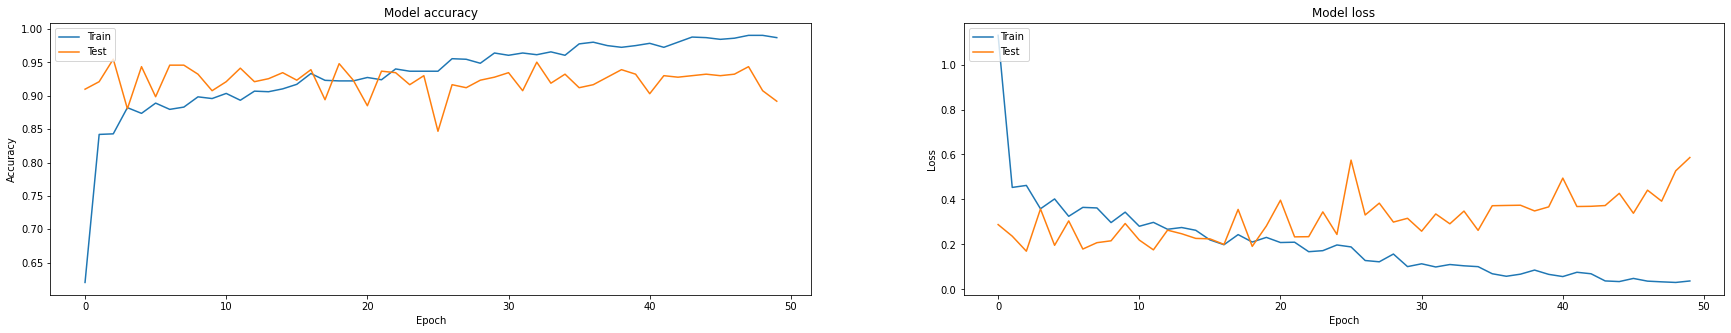

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [7]:
model.load_weights('E:/ziheng-projects/test_jerome/classification/tf2/TransLightNet_B32_50_noAug_Trans4_new4class_moreConv10_4M_0.9549.hdf5')
print(model.metrics_names)
model.evaluate(val_tensors, val_targets)

[]
14/14 [==============================] - 8s 88ms/step - loss: 0.1696 - accuracy: 0.9550


[0.16962605714797974, 0.954954981803894]

In [ ]:
#stop here

In [8]:
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==0].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/red.txt", index = False, header = True)

print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==1].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/white/crop/new/white.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==2].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/yellow/crop/new/yellow.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==3].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/blue/crop/new/blue.txt", index = False, header = True)


class label 0:
[2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
filename    0.972973
label       0.972973
dtype: float64
##########################################
class label 1:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1]
filename    0.927928
label       0.927928
dtype: float64
##########################################
class label 2:
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,

In [27]:
#Confusion metrix

In [11]:
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels0 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
#print(predicted_labels)

y_true0 = [0 for i in range(111)]
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/red.txt", index = False, header = True)
print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels1 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
y_true1 = [1 for i in range(111)]

#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N1.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels2 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==2].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
y_true2 = [2 for i in range(111)]
#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N2.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/111_img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels3 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==3].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/blue.txt", index = False, header = True)
y_true3 = [3 for i in range(111)]

class label 0:
##########################################
class label 1:
##########################################
class label 2:
##########################################
class label 3:


[[108   0   3   0]
 [  0 103   6   2]
 [  2   6 103   0]
 [  0   0   1 110]]


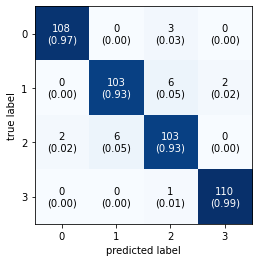

Accuracy_score: 0.955
Precision_score: 0.955
Recall: 0.955
F1_score: 0.955


In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from glob import glob 
y_true=y_true0+y_true1+y_true2+y_true3
y_pred=predicted_labels0+predicted_labels1+predicted_labels2+predicted_labels3
multiclass=confusion_matrix(y_true, y_pred)
print(multiclass)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=multiclass, show_absolute=True,  show_normed=True)#colorbar=True,
plt.show()

#accuracy_score, precision_score, recall_score, f1_score, 
print('Accuracy_score: %.3f' % accuracy_score(y_true, y_pred))
print('Precision_score: %.3f' % precision_score(y_true, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_true, y_pred,average='weighted'))
print('F1_score: %.3f' % f1_score(y_true, y_pred,average='weighted'))

In [ ]:
#before processing

In [32]:
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==0].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/red.txt", index = False, header = True)

print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==1].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/white.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==2].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/yellow.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==3].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/blue.txt", index = False, header = True)


class label 0:
[0, 0, 0, 0]
filename    1.0
label       1.0
dtype: float64
##########################################
class label 1:
[2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2]
filename    0.4375
label       0.4375
dtype: float64
##########################################
class label 2:
[2, 0]
filename    0.5
label       0.5
dtype: float64
##########################################
class label 3:
[1, 3, 3, 3, 3, 1, 1, 1]
filename    0.5
label       0.5
dtype: float64


class label 0:
##########################################
class label 1:
##########################################
class label 2:
##########################################
class label 3:


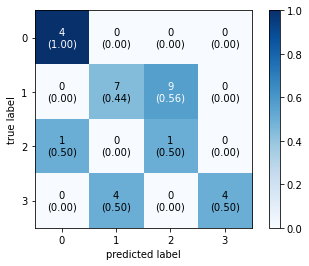

Accuracy_score: 0.533
Precision_score: 0.719
Recall: 0.533
F1_score: 0.584


In [41]:
###############################################confusion matrice
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels0 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
#print(predicted_labels)

y_true0 = [0 for i in range(4)]
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/red.txt", index = False, header = True)
print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels1 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
y_true1 = [1 for i in range(16)]

#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N1.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels2 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==2].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
y_true2 = [2 for i in range(2)]
#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N2.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels3 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==3].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/blue.txt", index = False, header = True)
y_true3 = [3 for i in range(8)]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from glob import glob 
y_true=y_true0+y_true1+y_true2+y_true3
y_pred=predicted_labels0+predicted_labels1+predicted_labels2+predicted_labels3
multiclass=confusion_matrix(y_true, y_pred)
#print(multiclass)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=multiclass,colorbar=True, show_absolute=True,  show_normed=True)
plt.show()

#accuracy_score, precision_score, recall_score, f1_score, 
print('Accuracy_score: %.3f' % accuracy_score(y_true, y_pred))
print('Precision_score: %.3f' % precision_score(y_true, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_true, y_pred,average='weighted'))
print('F1_score: %.3f' % f1_score(y_true, y_pred,average='weighted'))

In [ ]:
# after processing 

In [37]:
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==0].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/red.txt", index = False, header = True)

print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==1].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/white.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==2].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/yellow.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
print(predicted_labels)

test_df['label'] = np.array(predicted_labels)
submission = test_df[["filename", "label"]]

counts=submission.count()
a=submission[submission['label']==3].count()
s=submission[submission['label']>=0].count()
p=a/s
print(p)
submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/blue.txt", index = False, header = True)


class label 0:
[0, 0, 0, 2, 2, 2, 2, 2]
filename    0.375
label       0.375
dtype: float64
##########################################
class label 1:
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1]
filename    0.794118
label       0.794118
dtype: float64
##########################################
class label 2:
[2, 2, 1, 2, 1]
filename    0.6
label       0.6
dtype: float64
##########################################
class label 3:
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
filename    1.0
label       1.0
dtype: float64


class label 0:
##########################################
class label 1:
##########################################
class label 2:
##########################################
class label 3:


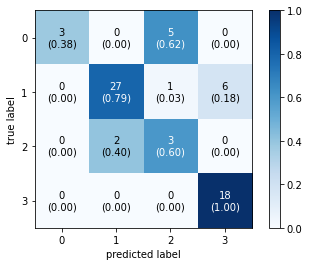

Accuracy_score: 0.785
Precision_score: 0.843
Recall: 0.785
F1_score: 0.786


In [42]:
###############################################confusion matrice
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels0 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
#print(predicted_labels)

y_true0 = [0 for i in range(8)]
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/red.txt", index = False, header = True)
print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels1 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
y_true1 = [1 for i in range(34)]

#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N1.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels2 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==2].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
y_true2 = [2 for i in range(5)]
#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N2.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels3 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==3].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/blue.txt", index = False, header = True)
y_true3 = [3 for i in range(18)]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from glob import glob 
y_true=y_true0+y_true1+y_true2+y_true3
y_pred=predicted_labels0+predicted_labels1+predicted_labels2+predicted_labels3
multiclass=confusion_matrix(y_true, y_pred)
#print(multiclass)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=multiclass,colorbar=True, show_absolute=True,  show_normed=True)
plt.show()

#accuracy_score, precision_score, recall_score, f1_score, 
print('Accuracy_score: %.3f' % accuracy_score(y_true, y_pred))
print('Precision_score: %.3f' % precision_score(y_true, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_true, y_pred,average='weighted'))
print('F1_score: %.3f' % f1_score(y_true, y_pred,average='weighted'))

class label 0:
##########################################
class label 1:
##########################################
class label 2:
##########################################
class label 3:


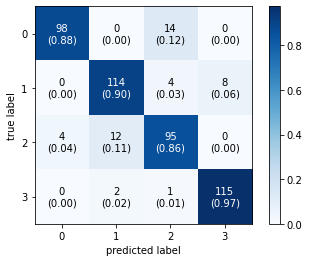

Accuracy_score: 0.904
Precision_score: 0.905
Recall: 0.904
F1_score: 0.904


In [43]:
############################################### New_mixed_confusion_matrice           
#class label 0
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/all_mixed_img/red/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels0 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 0:')
#print(predicted_labels)

y_true0 = [0 for i in range(112)]
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/red.txt", index = False, header = True)
print('##########################################')
#class label 1
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/all_mixed_img/white/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels1 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 1:')
y_true1 = [1 for i in range(126)]

#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N1.txt", index = False, header = True)
print('##########################################')
#class label 2
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/all_mixed_img/yellow/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels2 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 2:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==2].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
y_true2 = [2 for i in range(111)]
#submission.to_csv("/content/drive/My Drive/Malaria/Classification/test/predictions_N2.txt", index = False, header = True)
print('##########################################')
#class label 3
base_tile_dir = 'E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/zz_test_manual/new/all_mixed_img/blue/'
test_df = pd.DataFrame({'path': glob(os.path.join(base_tile_dir,'*.png'))})
test_df['filename'] = test_df.path.map(lambda x: x.split('\\')[1])
test_df.head(5)

test_df['image'] = test_df['path'].map(cv.imread)
test_images = np.stack(test_df.image, axis = 0)
#test_images = np.reshape(test_images,test_images.shape+(1,))
test_images.shape

predicted_labels3 =  [model.predict(np.expand_dims(tensor, axis=0))[0].argsort()[-1] for tensor in test_images]
print('class label 3:')
# print(predicted_labels)

# test_df['label'] = np.array(predicted_labels)
# submission = test_df[["filename", "label"]]

# counts=submission.count()
# a=submission[submission['label']==3].count()
# s=submission[submission['label']>=0].count()
# p=a/s
# print(p)
#submission.to_csv("E:/ziheng-projects/test_jerome/segmentation/data/aLatest/validation4_new/red/crop/new/blue.txt", index = False, header = True)
y_true3 = [3 for i in range(118)]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
#from glob import glob 
y_true=y_true0+y_true1+y_true2+y_true3
y_pred=predicted_labels0+predicted_labels1+predicted_labels2+predicted_labels3
multiclass=confusion_matrix(y_true, y_pred)
#print(multiclass)

from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plot_confusion_matrix(conf_mat=multiclass,colorbar=True, show_absolute=True,  show_normed=True)
plt.show()

#accuracy_score, precision_score, recall_score, f1_score, 
print('Accuracy_score: %.3f' % accuracy_score(y_true, y_pred))
print('Precision_score: %.3f' % precision_score(y_true, y_pred,average='weighted'))
print('Recall: %.3f' % recall_score(y_true, y_pred,average='weighted'))
print('F1_score: %.3f' % f1_score(y_true, y_pred,average='weighted'))